# Kerchunk Parquet Store Recipe
Requires the latest version of fsspec (2023.6.0+) for some of the options in the LazyReferenceMapper required by Parquet stores. Parquet also requires the library fastparquet (2023.7.0+) installed into your Kernel/Environment.

In [6]:
from fsspec.implementations.reference import ReferenceFileSystem
import matplotlib.pyplot as plt
import xarray as xr

There are two example parquet stores in this repository so far for two ESACCI datasets, these could be Kerchunked using the standard JSON format but for a comparison between the two methods, Parquet versions have also been created.
The directory structure reflects that of the Kerchunk pipeline output, which puts all files concerned with a specific dataset inside a single directory labelled with the project code. The kerchunk file revision is set to 1.0 for any new dataset, with revisions later on when fixing metadata.

In [7]:
pq = '../../examples/ESACCI-SEAICE-L3C-SITHICK-RA2_ENVISAT-NH25KMEASE2-200210-201203-fv2.0/kerchunk-kr1.0.parq'

Open Reference File System and use as Mapper for Xarray, with the Lazy loading option set as true and remote protocol as https for the Kerchunk file links using the CEDA DAP service.

In [8]:
fs = ReferenceFileSystem(
    pq, 
    remote_protocol='https', 
    target_protocol="file", 
    lazy=True)

Now we have the fs virtual filesystem object we can get a mapper for use in xarray to open a virtual dataset.

In [9]:
ds = xr.open_dataset(
    fs.get_mapper(), 
    engine="zarr",
    backend_kwargs={"consolidated": False, "decode_times": False}
)

The __ds__ virtual xarray dataset is then used as you would with a dataset opened directly from NetCDF.
Note that arrays within the virtual dataset are listed as DASK arrays, so to get actual values from calculations, the processing must be forced with methods like __.plot()__ or __.value()__

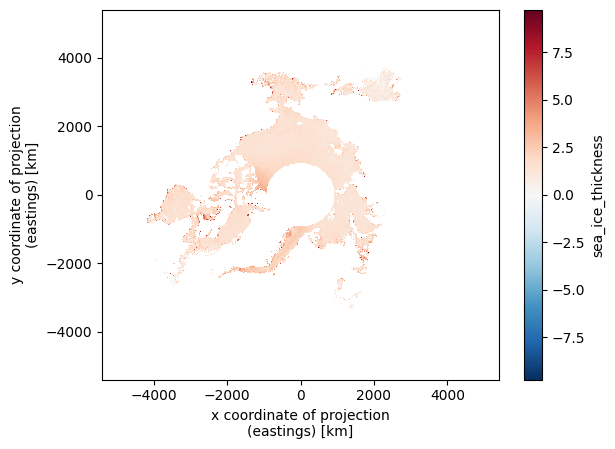

In [10]:
ds['sea_ice_thickness'].mean(dim='time').plot()